In [1]:
import pandas as pd
import numpy as np
import seaborn as sns



In [2]:
df = pd.read_csv('scraped_house_data.csv')
df.head()

C:\Users\Modern\AppData\Local\Temp\ipykernel_27256\541341603.py:1: DtypeWarning: Columns (15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('scraped_house_data.csv')


,City,Title,Description,Amount,Price/sqft,Posted Date,Age of Construction,Carpet Area,Status,Floor,...,Facing,Overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,Thane,3 BHK Ready to Occupy Flat for sale in Sunrise...,3bhk flat for salekalpataru sunrise close to n...,₹2.28 Cr,₹13702 per sqft,"Posted on: Nov 09, 24",NaN,1080 sqft,Ready to Move,20 out of 26,...,East,"Garden/Park, Main Road",Sunrise by Kalpataru,3,1,2 Covered,Freehold,NaN,NaN,NaN
1,Thane,1 BHK Ready to Occupy Flat for sale Krishna re...,NaN,₹17 Lac,₹5903 per sqft,"Posted on: Oct 20, 24",5 to 10 years,240 sqft,Ready to Move,3 out of 4,...,East,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,Thane,2 BHK Ready to Occupy Flat for sale in Rustomj...,This 2 bhk apartment is available for sale in ...,₹1.41 Cr,₹12589 per sqft,"Posted on: Nov 08, 24",NaN,746 sqft,Ready to Move,18 out of 36,...,East,"Garden/Park, Main Road",Rustomjee Urbania,2,3,1 Covered,Freehold,NaN,NaN,NaN
3,Thane,2 BHK Ready to Occupy Flat for sale Bhoomi Acr...,Multistorey apartment is available for sale. I...,₹48 Lac,₹8759 per sqft,"Posted on: Aug 02, 24",NaN,NaN,Ready to Move,6 out of 15,...,NaN,NaN,NaN,2,NaN,NaN,NaN,548 sqft,NaN,NaN
4,Thane,1 BHK Ready to Occupy Flat for sale NALLASOPAR...,It's a Ground floor Multistorey Apartment in a...,₹27 Lac,₹4279 per sqft,"Posted on: Oct 03, 24",Less than 5 years,NaN,Ready to Move,Ground out of 7,...,NaN,NaN,NaN,1,1,NaN,NaN,631 sqft,NaN,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331573 entries, 0 to 331572
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   City                 331573 non-null  object 
 1   Title                331573 non-null  object 
 2   Description          297345 non-null  object 
 3   Amount               331573 non-null  object 
 4   Price/sqft           304658 non-null  object 
 5   Posted Date          331573 non-null  object 
 6   Age of Construction  82371 non-null   object 
 7   Carpet Area          227233 non-null  object 
 8   Status               331325 non-null  object 
 9   Floor                316997 non-null  object 
 10  Transaction          331483 non-null  object 
 11  Furnishing           329998 non-null  object 
 12  Facing               227608 non-null  object 
 13  Overlooking          220726 non-null  object 
 14  Society              184224 non-null  object 
 15  Bathroom         

In [103]:
df.isnull().sum()

City                        0
Title                       0
Description             34228
Amount                      0
Price/sqft              26915
Posted Date                 0
Age of Construction    249202
Carpet Area            104340
Status                    248
Floor                   14576
Transaction                90
Furnishing               1575
Facing                 103965
Overlooking            110847
Society                147349
Bathroom                  989
Balcony                104170
Car Parking            170295
Ownership               95189
Super Area             227419
Dimensions             331567
Plot Area              331573
dtype: int64

In [104]:
# dropping unused column
df = df.drop(['Description', 'Society','Facing', 'Dimensions' , 'Plot Area','Status'], axis= 1)
df

,City,Title,Amount,Price/sqft,Posted Date,Age of Construction,Carpet Area,Floor,Transaction,Furnishing,Overlooking,Bathroom,Balcony,Car Parking,Ownership,Super Area
0,Thane,3 BHK Ready to Occupy Flat for sale in Sunrise...,₹2.28 Cr,₹13702 per sqft,"Posted on: Nov 09, 24",NaN,1080 sqft,20 out of 26,Resale,Unfurnished,"Garden/Park, Main Road",3,1,2 Covered,Freehold,NaN
1,Thane,1 BHK Ready to Occupy Flat for sale Krishna re...,₹17 Lac,₹5903 per sqft,"Posted on: Oct 20, 24",5 to 10 years,240 sqft,3 out of 4,Resale,Unfurnished,NaN,1,NaN,NaN,NaN,NaN
2,Thane,2 BHK Ready to Occupy Flat for sale in Rustomj...,₹1.41 Cr,₹12589 per sqft,"Posted on: Nov 08, 24",NaN,746 sqft,18 out of 36,Resale,Unfurnished,"Garden/Park, Main Road",2,3,1 Covered,Freehold,NaN
3,Thane,2 BHK Ready to Occupy Flat for sale Bhoomi Acr...,₹48 Lac,₹8759 per sqft,"Posted on: Aug 02, 24",NaN,NaN,6 out of 15,Resale,Unfurnished,NaN,2,NaN,NaN,NaN,548 sqft
4,Thane,1 BHK Ready to Occupy Flat for sale NALLASOPAR...,₹27 Lac,₹4279 per sqft,"Posted on: Oct 03, 24",Less than 5 years,NaN,Ground out of 7,Resale,Unfurnished,NaN,1,1,NaN,NaN,631 sqft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331568,Zirakpur,3 BHK Ready to Occupy Flat for sale in Sushma ...,₹85.9 Lac,₹5402 per sqft,"Posted on: Nov 10, 24",NaN,1450 sqft,5 out of 11,New Property,Semi-Furnished,Garden/Park,2,5.0,"1 Covered,",Freehold,NaN
331569,Zirakpur,3 BHK Ready to Occupy Flat for sale in Trishla...,₹1.32 Cr,₹7500 per sqft,"Posted on: Nov 11, 24",NaN,1100 sqft,3 out of 12,New Property,Semi-Furnished,Main Road,3,2.0,"1 Covered,",Freehold,NaN
331570,Zirakpur,3 BHK Ready to Occupy Flat for sale Peer Muchalla,Call for Price,NaN,"Posted on: Oct 15, 24",New Construction,112 sqft,1 out of 3,Resale,Semi-Furnished,Main Road,3,2.0,NaN,Freehold,NaN
331571,Zirakpur,2 BHK Ready to Occupy Flat for sale in Guru Na...,Call for Price,NaN,"Posted on: Oct 07, 24",Less than 5 years,NaN,1 out of 3,Resale,Semi-Furnished,Main Road,2,2.0,NaN,Freehold,100 sqft


In [105]:
df['Title'].value_counts()

Title
2 BHK Ready to Occupy Flat for sale in Shapoorji Pallonji Housing Complex Action Area 3    2697
2 BHK Ready to Occupy Flat for sale in Jones The Breeze Sithalapakkam                      2394
1 BHK Ready to Occupy Flat for sale in Hari Om Complex Kasba Peth                          2009
2 BHK Ready to Occupy Flat for sale in Anita Residency Katraj                              2009
1 BHK Ready to Occupy Flat for sale Ulhasnagar                                             1437
                                                                                           ... 
4 BHK Ready to Occupy Flat for sale in Gulmarg Apartment Jopling Road                         1
3 BHK Ready to Occupy Flat for sale in Hestia Apartment Sector 4 Gomti Nagar                  1
Studio Apartment for sale in Ansal Api Pocket 3 Sector L Sushant Golf City                    1
2 BHK Ready to Occupy Flat for sale in Astha Retreat Vrindavan Colony                         1
1 BHK Ready to Occupy Flat for sal

In [106]:
#extract The number of BHK from title and drop the title column
df['BHK'] = df['Title'].str.extract('(\d+)').astype(float)
df = df.drop(['Title'], axis= 1)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Modern\AppData\Local\Temp\ipykernel_15260\3653750511.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['BHK'] = df['Title'].str.extract('(\d+)').astype(float)


In [107]:
df['BHK'].value_counts()

BHK
2.0      125981
3.0      115045
1.0       51844
4.0       34388
5.0        1533
6.0         874
102.0       488
43.0        479
10.0         78
8.0          35
7.0          27
9.0          13
27.0          8
32.0          5
49.0          3
75.0          3
86.0          2
24.0          2
13.0          2
11.0          2
88.0          2
16.0          2
168.0         1
89.0          1
29.0          1
94.0          1
106.0         1
101.0         1
82.0          1
36.0          1
66.0          1
112.0         1
80.0          1
100.0         1
Name: count, dtype: int64

In [108]:
# replace BHK nan values with median
df['BHK'].fillna(df['BHK'].median(), inplace = True)
df['BHK'] = df['BHK'].astype(int)
df['BHK'].value_counts()

C:\Users\Modern\AppData\Local\Temp\ipykernel_15260\3159834585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BHK'].fillna(df['BHK'].median(), inplace = True)


BHK
2      126726
3      115045
1       51844
4       34388
5        1533
6         874
102       488
43        479
10         78
8          35
7          27
9          13
27          8
32          5
49          3
75          3
86          2
24          2
13          2
11          2
88          2
16          2
168         1
89          1
29          1
94          1
106         1
101         1
82          1
36          1
66          1
112         1
80          1
100         1
Name: count, dtype: int64

In [109]:
df['BHK'].isnull().sum()

0

In [110]:
df['Price/sqft'].value_counts()

Price/sqft
₹5000 per sqft     3441
₹4425 per sqft     2635
₹4000 per sqft     2097
₹4500 per sqft     2088
₹7500 per sqft     1857
                   ... 
₹1611 per sqft        1
₹2482 per sqft        1
₹5358 per sqft        1
₹11984 per sqft       1
₹7142 per sqft        1
Name: count, Length: 14791, dtype: int64

In [111]:
df['Price/sqft'] = df['Price/sqft'].str.replace('₹', '', regex=False)  # Remove the currency symbol
df['Price/sqft'] = df['Price/sqft'].str.replace(' per sqft', '', regex=False)  # Remove the "per sqft" text

# Handle empty strings by replacing them with NaN
df['Price/sqft'] = df['Price/sqft'].replace('', np.nan)

# Convert to numeric, handling NaN values
df['Price/sqft'] = pd.to_numeric(df['Price/sqft'], errors='coerce')
df['Price/sqft']

0         13702.0
1          5903.0
2         12589.0
3          8759.0
4          4279.0
           ...   
331568     5402.0
331569     7500.0
331570        NaN
331571        NaN
331572        NaN
Name: Price/sqft, Length: 331573, dtype: float64

In [112]:
df = df.dropna(subset= ['Price/sqft'])
df

,City,Amount,Price/sqft,Posted Date,Age of Construction,Carpet Area,Floor,Transaction,Furnishing,Overlooking,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK
0,Thane,₹2.28 Cr,13702.0,"Posted on: Nov 09, 24",NaN,1080 sqft,20 out of 26,Resale,Unfurnished,"Garden/Park, Main Road",3,1,2 Covered,Freehold,NaN,3
1,Thane,₹17 Lac,5903.0,"Posted on: Oct 20, 24",5 to 10 years,240 sqft,3 out of 4,Resale,Unfurnished,NaN,1,NaN,NaN,NaN,NaN,1
2,Thane,₹1.41 Cr,12589.0,"Posted on: Nov 08, 24",NaN,746 sqft,18 out of 36,Resale,Unfurnished,"Garden/Park, Main Road",2,3,1 Covered,Freehold,NaN,2
3,Thane,₹48 Lac,8759.0,"Posted on: Aug 02, 24",NaN,NaN,6 out of 15,Resale,Unfurnished,NaN,2,NaN,NaN,NaN,548 sqft,2
4,Thane,₹27 Lac,4279.0,"Posted on: Oct 03, 24",Less than 5 years,NaN,Ground out of 7,Resale,Unfurnished,NaN,1,1,NaN,NaN,631 sqft,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331565,Zirakpur,₹95 Lac,5520.0,"Posted on: Nov 11, 24",NaN,1012 sqft,5 out of 9,Resale,Semi-Furnished,"Garden/Park, Main Road",3,4.0,1 Covered,Freehold,NaN,3
331566,Zirakpur,₹64 Lac,7248.0,"Posted on: Nov 10, 24",NaN,418 sqft,7 out of 13,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",2,2.0,"1 Covered,",Freehold,NaN,1
331567,Zirakpur,₹1.25 Cr,5556.0,"Posted on: Nov 05, 24",NaN,200 sqyrd,2 out of 4,New Property,Semi-Furnished,Main Road,3,2.0,"1 Covered,",Freehold,NaN,3
331568,Zirakpur,₹85.9 Lac,5402.0,"Posted on: Nov 10, 24",NaN,1450 sqft,5 out of 11,New Property,Semi-Furnished,Garden/Park,2,5.0,"1 Covered,",Freehold,NaN,3


In [113]:
df['Carpet Area'].value_counts()

Carpet Area
900 sqft     5562
1100 sqft    4860
1200 sqft    4770
1000 sqft    4062
1500 sqft    3852
             ... 
2925 sqft       1
124 sqyrd       1
163 sqft        1
2880 sqft       1
1782 sqft       1
Name: count, Length: 2930, dtype: int64

In [114]:
#checking other unit other than sqft
other_units = df['Carpet Area'].str.extract(r'(\D+)')[0].unique()
other_units

array([' sqft', nan, ' sqm', ' are', ' sqyrd', ' marla', ' cent', ' acre',
       ' bigha', ' kottah', ' ground'], dtype=object)

In [115]:
other_units = df['Super Area'].str.extract(r'(\D+)')[0].unique()
other_units

array([nan, ' sqft', ' sqm', ' sqyrd', ',', ' acre', ' cent', ' biswa',
       ' marla', ' aankadam'], dtype=object)

In [116]:
unit_counts = df['Carpet Area'].str.extract(r'(\D+)')[0].value_counts()
unit_counts

0
sqft      197446
sqyrd       5110
sqm          466
marla          4
cent           3
are            2
acre           1
bigha          1
kottah         1
ground         1
Name: count, dtype: int64

In [117]:
unit_counts = df['Super Area'].str.extract(r'(\D+)')[0].value_counts()
unit_counts

0
 sqft        96123
 sqyrd        4084
 sqm          1380
,               17
 cent            5
 biswa           5
 marla           4
 acre            1
 aankadam        1
Name: count, dtype: int64

In [118]:
#convert all area to sqft
def convert_area_to_sqft(area):
    if pd.notna(area):
        value, unit = area.split()
        value = float(value)
        if unit == 'sqft':
            return value
        elif unit == 'sqyrd':
            return value * 9
        elif unit == 'sqm':
            return value * 10.7
        elif unit == 'marla':
            return value * 272.2
        elif unit == 'acre':
            return value * 43560
        elif unit == 'kanal':
            return value * 5445
        elif unit == 'ground':
            return value * 2400
        elif unit == 'cent':
            return value * 435.5
        elif unit == 'bigha':
            return value * 27000
        elif unit == 'aankadam ':
            return value * 72
    return None

df['Carpet Area Sqft'] = df['Carpet Area'].apply(convert_area_to_sqft)

In [119]:
df['Super Area'] = df['Super Area'].str.replace(',', '', regex=True)

In [120]:
df['Super Area Sqft'] = df['Super Area'].apply(convert_area_to_sqft)

In [121]:
df[['Carpet Area Sqft', 'Super Area Sqft']]

,Carpet Area Sqft,Super Area Sqft
0,1080.0,NaN
1,240.0,NaN
2,746.0,NaN
3,NaN,548.0
4,NaN,631.0
...,...,...
331565,1012.0,NaN
331566,418.0,NaN
331567,1800.0,NaN
331568,1450.0,NaN


In [122]:
#combining Carpet Area and super area to fill the nan values and create new feature
df['Area (Sqft)'] = df['Carpet Area Sqft'].combine_first(df['Super Area Sqft'])
df['Area (Sqft)']

0         1080.0
1          240.0
2          746.0
3          548.0
4          631.0
           ...  
331565    1012.0
331566     418.0
331567    1800.0
331568    1450.0
331569    1100.0
Name: Area (Sqft), Length: 304658, dtype: float64

In [123]:
df['Area (Sqft)'] = df['Area (Sqft)'].fillna(df['Area (Sqft)'].mean())
df['Area (Sqft)'].isnull().sum()

0

In [124]:
df['Area (Sqft)'] = df['Area (Sqft)'].astype(int)
df.head()

,City,Amount,Price/sqft,Posted Date,Age of Construction,Carpet Area,Floor,Transaction,Furnishing,Overlooking,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Carpet Area Sqft,Super Area Sqft,Area (Sqft)
0,Thane,₹2.28 Cr,13702.0,"Posted on: Nov 09, 24",NaN,1080 sqft,20 out of 26,Resale,Unfurnished,"Garden/Park, Main Road",3,1,2 Covered,Freehold,NaN,3,1080.0,NaN,1080
1,Thane,₹17 Lac,5903.0,"Posted on: Oct 20, 24",5 to 10 years,240 sqft,3 out of 4,Resale,Unfurnished,NaN,1,NaN,NaN,NaN,NaN,1,240.0,NaN,240
2,Thane,₹1.41 Cr,12589.0,"Posted on: Nov 08, 24",NaN,746 sqft,18 out of 36,Resale,Unfurnished,"Garden/Park, Main Road",2,3,1 Covered,Freehold,NaN,2,746.0,NaN,746
3,Thane,₹48 Lac,8759.0,"Posted on: Aug 02, 24",NaN,NaN,6 out of 15,Resale,Unfurnished,NaN,2,NaN,NaN,NaN,548 sqft,2,NaN,548.0,548
4,Thane,₹27 Lac,4279.0,"Posted on: Oct 03, 24",Less than 5 years,NaN,Ground out of 7,Resale,Unfurnished,NaN,1,1,NaN,NaN,631 sqft,1,NaN,631.0,631


In [125]:
df = df.drop(['Carpet Area', 'Super Area', 'Super Area Sqft', 'Carpet Area Sqft'] ,axis = 1)
df

,City,Amount,Price/sqft,Posted Date,Age of Construction,Floor,Transaction,Furnishing,Overlooking,Bathroom,Balcony,Car Parking,Ownership,BHK,Area (Sqft)
0,Thane,₹2.28 Cr,13702.0,"Posted on: Nov 09, 24",NaN,20 out of 26,Resale,Unfurnished,"Garden/Park, Main Road",3,1,2 Covered,Freehold,3,1080
1,Thane,₹17 Lac,5903.0,"Posted on: Oct 20, 24",5 to 10 years,3 out of 4,Resale,Unfurnished,NaN,1,NaN,NaN,NaN,1,240
2,Thane,₹1.41 Cr,12589.0,"Posted on: Nov 08, 24",NaN,18 out of 36,Resale,Unfurnished,"Garden/Park, Main Road",2,3,1 Covered,Freehold,2,746
3,Thane,₹48 Lac,8759.0,"Posted on: Aug 02, 24",NaN,6 out of 15,Resale,Unfurnished,NaN,2,NaN,NaN,NaN,2,548
4,Thane,₹27 Lac,4279.0,"Posted on: Oct 03, 24",Less than 5 years,Ground out of 7,Resale,Unfurnished,NaN,1,1,NaN,NaN,1,631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331565,Zirakpur,₹95 Lac,5520.0,"Posted on: Nov 11, 24",NaN,5 out of 9,Resale,Semi-Furnished,"Garden/Park, Main Road",3,4.0,1 Covered,Freehold,3,1012
331566,Zirakpur,₹64 Lac,7248.0,"Posted on: Nov 10, 24",NaN,7 out of 13,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",2,2.0,"1 Covered,",Freehold,1,418
331567,Zirakpur,₹1.25 Cr,5556.0,"Posted on: Nov 05, 24",NaN,2 out of 4,New Property,Semi-Furnished,Main Road,3,2.0,"1 Covered,",Freehold,3,1800
331568,Zirakpur,₹85.9 Lac,5402.0,"Posted on: Nov 10, 24",NaN,5 out of 11,New Property,Semi-Furnished,Garden/Park,2,5.0,"1 Covered,",Freehold,3,1450


In [126]:
#function to create new feature ( floor ratio)
def floor_ratio(floor_str):
    floor_str = str(floor_str)
    floor = floor_str.split()[0]
    total_floors = floor_str.split()[-1]    
    if floor in ['Ground', 'Upper', 'Lower','Unknown']: return 0
    return int(floor)/int(total_floors)

In [127]:
df['Floor'] = df['Floor'].fillna('Unknown')
df['Floor Ratio'] = df['Floor'].apply(floor_ratio)
df['Floor Ratio']

0         0.769231
1         0.750000
2         0.500000
3         0.400000
4         0.000000
            ...   
331565    0.555556
331566    0.538462
331567    0.500000
331568    0.454545
331569    0.250000
Name: Floor Ratio, Length: 304658, dtype: float64

In [128]:
df['Floor Ratio'] = df['Floor Ratio'].round(2)

In [129]:
df = df.drop(['Floor'], axis = 1)
df

,City,Amount,Price/sqft,Posted Date,Age of Construction,Transaction,Furnishing,Overlooking,Bathroom,Balcony,Car Parking,Ownership,BHK,Area (Sqft),Floor Ratio
0,Thane,₹2.28 Cr,13702.0,"Posted on: Nov 09, 24",NaN,Resale,Unfurnished,"Garden/Park, Main Road",3,1,2 Covered,Freehold,3,1080,0.77
1,Thane,₹17 Lac,5903.0,"Posted on: Oct 20, 24",5 to 10 years,Resale,Unfurnished,NaN,1,NaN,NaN,NaN,1,240,0.75
2,Thane,₹1.41 Cr,12589.0,"Posted on: Nov 08, 24",NaN,Resale,Unfurnished,"Garden/Park, Main Road",2,3,1 Covered,Freehold,2,746,0.50
3,Thane,₹48 Lac,8759.0,"Posted on: Aug 02, 24",NaN,Resale,Unfurnished,NaN,2,NaN,NaN,NaN,2,548,0.40
4,Thane,₹27 Lac,4279.0,"Posted on: Oct 03, 24",Less than 5 years,Resale,Unfurnished,NaN,1,1,NaN,NaN,1,631,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331565,Zirakpur,₹95 Lac,5520.0,"Posted on: Nov 11, 24",NaN,Resale,Semi-Furnished,"Garden/Park, Main Road",3,4.0,1 Covered,Freehold,3,1012,0.56
331566,Zirakpur,₹64 Lac,7248.0,"Posted on: Nov 10, 24",NaN,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",2,2.0,"1 Covered,",Freehold,1,418,0.54
331567,Zirakpur,₹1.25 Cr,5556.0,"Posted on: Nov 05, 24",NaN,New Property,Semi-Furnished,Main Road,3,2.0,"1 Covered,",Freehold,3,1800,0.50
331568,Zirakpur,₹85.9 Lac,5402.0,"Posted on: Nov 10, 24",NaN,New Property,Semi-Furnished,Garden/Park,2,5.0,"1 Covered,",Freehold,3,1450,0.45


In [130]:
df['Age of Construction'].value_counts()

Age of Construction
Less than 5 years     25665
5 to 10 years         14244
New Construction      13885
10 to 15 years         8469
15 to 20 years         3464
Above 20 years         2747
Under Construction        1
Name: count, dtype: int64

In [131]:
df = df[df['Age of Construction'] != 'Under Construction']

In [132]:
#replace nan values in ordinal encoded columns 
df['Transaction'] = df['Transaction'].fillna('Resale')
df['Ownership'] = df['Ownership'].fillna('Freehold')
df['Furnishing'] = df['Furnishing'].fillna('Semi-Furnished')
df['Age of Construction'] = df['Age of Construction'].fillna(df['Age of Construction'].mode()[0])

C:\Users\Modern\AppData\Local\Temp\ipykernel_15260\1603704784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction'] = df['Transaction'].fillna('Resale')
C:\Users\Modern\AppData\Local\Temp\ipykernel_15260\1603704784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ownership'] = df['Ownership'].fillna('Freehold')
C:\Users\Modern\AppData\Local\Temp\ipykernel_15260\1603704784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [133]:
df[['Transaction', 'Furnishing', 'Ownership']].value_counts()

Transaction   Furnishing      Ownership           
Resale        Unfurnished     Freehold                86892
              Semi-Furnished  Freehold                72818
New Property  Unfurnished     Freehold                38991
Resale        Furnished       Freehold                34615
New Property  Semi-Furnished  Freehold                21129
Resale        Unfurnished     Co-operative Society    17079
              Semi-Furnished  Co-operative Society     9125
                              Leasehold                6565
              Furnished       Co-operative Society     4595
              Unfurnished     Leasehold                4575
New Property  Furnished       Freehold                 3264
              Unfurnished     Co-operative Society     1611
Resale        Semi-Furnished  Power Of Attorney         878
New Property  Semi-Furnished  Leasehold                 792
              Unfurnished     Leasehold                 581
Resale        Furnished       Leasehold          

In [134]:
df[['Transaction', 'Furnishing', 'Ownership', 'Age of Construction']] = df[['Transaction', 'Furnishing', 'Ownership', 'Age of Construction']].astype(str)

C:\Users\Modern\AppData\Local\Temp\ipykernel_15260\1869520933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Transaction', 'Furnishing', 'Ownership', 'Age of Construction']] = df[['Transaction', 'Furnishing', 'Ownership', 'Age of Construction']].astype(str)


In [135]:
df['New Property'] = df['Transaction'].apply(lambda x: 1 if 'New Property' in str(x) else 0) 
df['Resale'] = df['Transaction'].apply(lambda x: 1 if 'Resale' in str(x) else 0)
df['Other'] = df['Transaction'].apply(lambda x: 1 if 'Other' in str(x) else 0)
df['Rent/Lease'] = df['Transaction'].apply(lambda x: 1 if 'Rent/Lease' in str(x) else 0)
df['Furnished'] = df['Furnishing'].apply(lambda x: 1 if 'Furnished' in str(x) else 0)
df['Semi-Furnished'] = df['Furnishing'].apply(lambda x: 1 if 'Semi-Furnished' in str(x) else 0)
df['Unfurnished'] = df['Furnishing'].apply(lambda x: 1 if 'Unfurnised' in str(x) else 0)
df['Freehold'] = df['Ownership'].apply(lambda x: 1 if 'Freehold' in str(x) else 0)
df['Co-operative Society'] = df['Ownership'].apply(lambda x: 1 if 'Co-operative Society' in str(x) else 0)
df['Leasehold'] = df['Ownership'].apply(lambda x: 1 if 'Leasehold' in str(x) else 0)
df['Power Of Attorney'] = df['Ownership'].apply(lambda x: 1 if 'Power Of Attorney' in str(x) else 0)
df['Age Less than 5 Years'] = df['Age of Construction'].apply(lambda x: 1 if 'Less than 5 years' in str(x) else 0)
df['Age 5 to 10 Years'] = df['Age of Construction'].apply(lambda x: 1 if '5 to 10 years' in str(x) else 0)
df['Age 10 to 15 Years'] = df['Age of Construction'].apply(lambda x: 1 if '10 to 20 years' in str(x) else 0)
df['Age 15 to 20 Years'] = df['Age of Construction'].apply(lambda x: 1 if '15 to 20 years' in str(x) else 0)
df['New Construction'] = df['Age of Construction'].apply(lambda x: 1 if 'New Construction' in str(x) else 0)
df['Age above 20 Years'] = df['Age of Construction'].apply(lambda x: 1 if 'Above 20 years' in str(x) else 0)

C:\Users\Modern\AppData\Local\Temp\ipykernel_15260\3962014892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Property'] = df['Transaction'].apply(lambda x: 1 if 'New Property' in str(x) else 0)
C:\Users\Modern\AppData\Local\Temp\ipykernel_15260\3962014892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resale'] = df['Transaction'].apply(lambda x: 1 if 'Resale' in str(x) else 0)
C:\Users\Modern\AppData\Local\Temp\ipykernel_15260\3962014892.py:3: SettingWithCopyWarning: 
A value is trying

In [136]:
df = df.drop(columns= ['Other', 'Rent/Lease'], axis = 1)
df.head()

,City,Amount,Price/sqft,Posted Date,Age of Construction,Transaction,Furnishing,Overlooking,Bathroom,Balcony,...,Freehold,Co-operative Society,Leasehold,Power Of Attorney,Age Less than 5 Years,Age 5 to 10 Years,Age 10 to 15 Years,Age 15 to 20 Years,New Construction,Age above 20 Years
0,Thane,₹2.28 Cr,13702.0,"Posted on: Nov 09, 24",Less than 5 years,Resale,Unfurnished,"Garden/Park, Main Road",3,1,...,1,0,0,0,1,0,0,0,0,0
1,Thane,₹17 Lac,5903.0,"Posted on: Oct 20, 24",5 to 10 years,Resale,Unfurnished,NaN,1,NaN,...,1,0,0,0,0,1,0,0,0,0
2,Thane,₹1.41 Cr,12589.0,"Posted on: Nov 08, 24",Less than 5 years,Resale,Unfurnished,"Garden/Park, Main Road",2,3,...,1,0,0,0,1,0,0,0,0,0
3,Thane,₹48 Lac,8759.0,"Posted on: Aug 02, 24",Less than 5 years,Resale,Unfurnished,NaN,2,NaN,...,1,0,0,0,1,0,0,0,0,0
4,Thane,₹27 Lac,4279.0,"Posted on: Oct 03, 24",Less than 5 years,Resale,Unfurnished,NaN,1,1,...,1,0,0,0,1,0,0,0,0,0


In [137]:
df = df.drop(columns = ['Transaction', 'Ownership', 'Furnishing', 'Age of Construction'], axis = 1)

In [138]:
df['Overlooking'].value_counts()

Overlooking
Main Road                                      56267
Garden/Park                                    53560
Garden/Park, Main Road                         44210
Garden/Park, Pool, Main Road                   33442
Pool, Garden/Park, Main Road                    8681
Garden/Park, Pool                               5372
Main Road, Garden/Park                          2565
Pool, Garden/Park                               2227
Pool                                            2094
Pool, Main Road                                  611
Main Road, Garden/Park, Pool                     609
Garden/Park, Main Road, Pool                      67
Main Road, Pool, Garden/Park                      25
Main Road, Pool                                   22
Main Road, Not Available                          14
Pool, Main Road, Garden/Park                       6
Garden/Park, Not Available                         1
Garden/Park, Pool, Main Road, Not Available        1
Garden/Park, Main Road, Not Availa

In [139]:
#extract values in overlooking
df['Overlooking'] = df['Overlooking'].fillna('')
df['Main Road'] = df['Overlooking'].apply(lambda x: 1 if 'Main Road' in str(x) else 0)
df['Garden/Park'] = df['Overlooking'].apply(lambda x: 1 if 'Garden/Park' in str(x) else 0)
df['Pool'] = df['Overlooking'].apply(lambda x: 1 if 'Pool' in str(x) else 0)

In [140]:
df = df.drop(columns= ['Overlooking'])

In [141]:
df['Bathroom'].value_counts()

Bathroom
2       133634
3        51985
1        27511
2.0      26235
4        21451
3.0      15578
1.0       9698
4.0       7209
5         6940
5.0       1948
6         1421
7           37
6.0         35
> 10        32
8           27
10          15
9           12
7.0         10
8.0          3
Name: count, dtype: int64

In [142]:
df['Bathroom'] = df['Bathroom'].replace('> 10', '11')


In [143]:
df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce')

In [144]:
df['Bathroom'].median()

2.0

In [145]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())



In [146]:
df['Bathroom'] = df['Bathroom'].astype(int)
df

,City,Amount,Price/sqft,Posted Date,Bathroom,Balcony,Car Parking,BHK,Area (Sqft),Floor Ratio,...,Power Of Attorney,Age Less than 5 Years,Age 5 to 10 Years,Age 10 to 15 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool
0,Thane,₹2.28 Cr,13702.0,"Posted on: Nov 09, 24",3,1,2 Covered,3,1080,0.77,...,0,1,0,0,0,0,0,1,1,0
1,Thane,₹17 Lac,5903.0,"Posted on: Oct 20, 24",1,NaN,NaN,1,240,0.75,...,0,0,1,0,0,0,0,0,0,0
2,Thane,₹1.41 Cr,12589.0,"Posted on: Nov 08, 24",2,3,1 Covered,2,746,0.50,...,0,1,0,0,0,0,0,1,1,0
3,Thane,₹48 Lac,8759.0,"Posted on: Aug 02, 24",2,NaN,NaN,2,548,0.40,...,0,1,0,0,0,0,0,0,0,0
4,Thane,₹27 Lac,4279.0,"Posted on: Oct 03, 24",1,1,NaN,1,631,0.00,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331565,Zirakpur,₹95 Lac,5520.0,"Posted on: Nov 11, 24",3,4.0,1 Covered,3,1012,0.56,...,0,1,0,0,0,0,0,1,1,0
331566,Zirakpur,₹64 Lac,7248.0,"Posted on: Nov 10, 24",2,2.0,"1 Covered,",1,418,0.54,...,0,1,0,0,0,0,0,1,1,1
331567,Zirakpur,₹1.25 Cr,5556.0,"Posted on: Nov 05, 24",3,2.0,"1 Covered,",3,1800,0.50,...,0,1,0,0,0,0,0,1,0,0
331568,Zirakpur,₹85.9 Lac,5402.0,"Posted on: Nov 10, 24",2,5.0,"1 Covered,",3,1450,0.45,...,0,1,0,0,0,0,0,0,1,0


In [147]:
df['Bathroom'].value_counts()

Bathroom
2     160745
3      67563
1      37209
4      28660
5       8888
6       1456
7         47
11        32
8         30
10        15
9         12
Name: count, dtype: int64

In [148]:
df['Balcony'].value_counts()

Balcony
2       58264
1       52826
3       33762
1.0     25929
4       15013
2.0     12633
3.0      5989
5        3420
4.0      1718
6         633
5.0       250
7         174
10        157
6.0        28
8          15
10.0        5
> 10        5
7.0         4
9           4
8.0         1
Name: count, dtype: int64

In [149]:
df['Balcony'] = df['Balcony'].replace('> 10', '11')


In [150]:
df['Balcony'] = pd.to_numeric(df['Balcony'], errors='coerce')


In [151]:
# Fill missing values with the mode
df['Balcony'] = df['Balcony'].fillna(df['Balcony'].median())




In [152]:
df['Balcony'] = df['Balcony'].astype(int)

In [153]:
df['Balcony'].value_counts()

Balcony
2     164724
1      78755
3      39751
4      16731
5       3670
6        661
7        178
10       162
8         16
11         5
9          4
Name: count, dtype: int64

In [154]:
df['Car Parking'].value_counts()

Car Parking
1 Covered       81597
1 Covered,      23080
2 Covered       22151
1 Open          15913
3 Covered        5512
                ...  
385 Covered         1
513 Covered         1
11 Covered,         1
31 Covered          1
301 Covered,        1
Name: count, Length: 257, dtype: int64

In [155]:
df['Parking Spaces'] = df['Car Parking'].str.extract(r'(\d+)').astype(float)
df['Parking Spaces']

0         2.0
1         NaN
2         1.0
3         NaN
4         NaN
         ... 
331565    1.0
331566    1.0
331567    1.0
331568    1.0
331569    1.0
Name: Parking Spaces, Length: 304657, dtype: float64

In [156]:
df['Parking Spaces'].fillna(df['Parking Spaces'].median(), inplace = True)

In [157]:
df['Parking Spaces'] = df['Parking Spaces'].astype(int)

In [158]:
df = df.drop(columns= ['Car Parking'], axis= 1)

In [159]:
df['Parking Spaces'].value_counts()

Parking Spaces
1      268442
2       27239
3        5799
4        2007
8         312
        ...  
31          1
130         1
390         1
162         1
315         1
Name: count, Length: 166, dtype: int64

In [160]:
df = df.drop(columns= ['Posted Date'], axis = 1)


In [161]:
df['Amount'].value_counts()

Amount
₹45 Lac      7678
₹75 Lac      7465
₹35 Lac      6093
₹55 Lac      5379
₹1.20 Cr     5220
             ... 
₹7.48 Cr        1
₹18.50 Cr       1
₹16.4 Lac       1
₹7.58 Cr        1
₹13.1 Lac       1
Name: count, Length: 1756, dtype: int64

In [162]:
df['Amount'] = df['Amount'].str.replace('₹', '', regex= False)

In [163]:
# converting non lac amount to amount in lac
def convert_amount_to_lac(value):
    if isinstance(value, str):
        if 'Lac' in value:
            return int(float(value.replace('Lac', '')))
        elif 'Cr' in value:
            return int(float(value.replace('Cr', '')) * 100) # 1 Cr is equal to 100 lac
        elif 'Call for Price' in value:
            return np.nan
        
    # handle cases if value is already float or not convertible
    try:
        return int(float(value))
    except (ValueError, TypeError):
        return np.nan

In [164]:
df['Amount (Lac)'] = df['Amount'].apply(convert_amount_to_lac)
df['Amount (Lac)']

0         227
1          17
2         141
3          48
4          27
         ... 
331565     95
331566     64
331567    125
331568     85
331569    132
Name: Amount (Lac), Length: 304657, dtype: int64

In [165]:
df = df.drop(['Amount'], axis = 1)

df

,City,Price/sqft,Bathroom,Balcony,BHK,Area (Sqft),Floor Ratio,New Property,Resale,Furnished,...,Age 5 to 10 Years,Age 10 to 15 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool,Parking Spaces,Amount (Lac)
0,Thane,13702.0,3,1,3,1080,0.77,0,1,0,...,0,0,0,0,0,1,1,0,2,227
1,Thane,5903.0,1,2,1,240,0.75,0,1,0,...,1,0,0,0,0,0,0,0,1,17
2,Thane,12589.0,2,3,2,746,0.50,0,1,0,...,0,0,0,0,0,1,1,0,1,141
3,Thane,8759.0,2,2,2,548,0.40,0,1,0,...,0,0,0,0,0,0,0,0,1,48
4,Thane,4279.0,1,1,1,631,0.00,0,1,0,...,0,0,0,0,0,0,0,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331565,Zirakpur,5520.0,3,4,3,1012,0.56,0,1,1,...,0,0,0,0,0,1,1,0,1,95
331566,Zirakpur,7248.0,2,2,1,418,0.54,0,1,1,...,0,0,0,0,0,1,1,1,1,64
331567,Zirakpur,5556.0,3,2,3,1800,0.50,1,0,1,...,0,0,0,0,0,1,0,0,1,125
331568,Zirakpur,5402.0,2,5,3,1450,0.45,1,0,1,...,0,0,0,0,0,0,1,0,1,85


In [166]:
df = df.dropna( subset = ['Amount (Lac)'])
df

,City,Price/sqft,Bathroom,Balcony,BHK,Area (Sqft),Floor Ratio,New Property,Resale,Furnished,...,Age 5 to 10 Years,Age 10 to 15 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool,Parking Spaces,Amount (Lac)
0,Thane,13702.0,3,1,3,1080,0.77,0,1,0,...,0,0,0,0,0,1,1,0,2,227
1,Thane,5903.0,1,2,1,240,0.75,0,1,0,...,1,0,0,0,0,0,0,0,1,17
2,Thane,12589.0,2,3,2,746,0.50,0,1,0,...,0,0,0,0,0,1,1,0,1,141
3,Thane,8759.0,2,2,2,548,0.40,0,1,0,...,0,0,0,0,0,0,0,0,1,48
4,Thane,4279.0,1,1,1,631,0.00,0,1,0,...,0,0,0,0,0,0,0,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331565,Zirakpur,5520.0,3,4,3,1012,0.56,0,1,1,...,0,0,0,0,0,1,1,0,1,95
331566,Zirakpur,7248.0,2,2,1,418,0.54,0,1,1,...,0,0,0,0,0,1,1,1,1,64
331567,Zirakpur,5556.0,3,2,3,1800,0.50,1,0,1,...,0,0,0,0,0,1,0,0,1,125
331568,Zirakpur,5402.0,2,5,3,1450,0.45,1,0,1,...,0,0,0,0,0,0,1,0,1,85


In [167]:
df['Amount (Lac)'].isnull().sum()

0

In [168]:
df.head()

,City,Price/sqft,Bathroom,Balcony,BHK,Area (Sqft),Floor Ratio,New Property,Resale,Furnished,...,Age 5 to 10 Years,Age 10 to 15 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool,Parking Spaces,Amount (Lac)
0,Thane,13702.0,3,1,3,1080,0.77,0,1,0,...,0,0,0,0,0,1,1,0,2,227
1,Thane,5903.0,1,2,1,240,0.75,0,1,0,...,1,0,0,0,0,0,0,0,1,17
2,Thane,12589.0,2,3,2,746,0.50,0,1,0,...,0,0,0,0,0,1,1,0,1,141
3,Thane,8759.0,2,2,2,548,0.40,0,1,0,...,0,0,0,0,0,0,0,0,1,48
4,Thane,4279.0,1,1,1,631,0.00,0,1,0,...,0,0,0,0,0,0,0,0,1,27


In [169]:
df.isnull().sum()

City                     0
Price/sqft               0
Bathroom                 0
Balcony                  0
BHK                      0
Area (Sqft)              0
Floor Ratio              0
New Property             0
Resale                   0
Furnished                0
Semi-Furnished           0
Unfurnished              0
Freehold                 0
Co-operative Society     0
Leasehold                0
Power Of Attorney        0
Age Less than 5 Years    0
Age 5 to 10 Years        0
Age 10 to 15 Years       0
Age 15 to 20 Years       0
New Construction         0
Age above 20 Years       0
Main Road                0
Garden/Park              0
Pool                     0
Parking Spaces           0
Amount (Lac)             0
dtype: int64

In [170]:
df.duplicated().sum()

221339

In [171]:
df = df.drop_duplicates()


In [172]:
df.shape

(83318, 27)

In [173]:
df.head()

,City,Price/sqft,Bathroom,Balcony,BHK,Area (Sqft),Floor Ratio,New Property,Resale,Furnished,...,Age 5 to 10 Years,Age 10 to 15 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool,Parking Spaces,Amount (Lac)
0,Thane,13702.0,3,1,3,1080,0.77,0,1,0,...,0,0,0,0,0,1,1,0,2,227
1,Thane,5903.0,1,2,1,240,0.75,0,1,0,...,1,0,0,0,0,0,0,0,1,17
2,Thane,12589.0,2,3,2,746,0.50,0,1,0,...,0,0,0,0,0,1,1,0,1,141
3,Thane,8759.0,2,2,2,548,0.40,0,1,0,...,0,0,0,0,0,0,0,0,1,48
4,Thane,4279.0,1,1,1,631,0.00,0,1,0,...,0,0,0,0,0,0,0,0,1,27


In [174]:
df.describe()

,Price/sqft,Bathroom,Balcony,BHK,Area (Sqft),Floor Ratio,New Property,Resale,Furnished,Semi-Furnished,...,Age 5 to 10 Years,Age 10 to 15 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool,Parking Spaces,Amount (Lac)
count,8.331800e+04,83318.000000,83318.000000,83318.000000,8.331800e+04,83318.000000,83318.000000,83318.000000,83318.000000,83318.000000,...,83318.000000,83318.0,83318.000000,83318.000000,83318.000000,83318.000000,83318.000000,83318.000000,83318.000000,8.331800e+04
mean,1.031831e+04,2.371312,2.086020,2.520572,2.011454e+03,0.506864,0.189827,0.810149,0.556218,0.423078,...,0.078734,0.0,0.012806,0.066192,0.010850,0.438765,0.411736,0.153748,2.257591,2.103239e+02
std,2.656443e+05,0.912193,0.885031,1.899197,1.546192e+05,0.302952,0.392166,0.392185,0.496832,0.494051,...,0.269326,0.0,0.112439,0.248619,0.103597,0.496239,0.492151,0.360709,21.819559,2.055217e+04
min,0.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00
25%,4.286000e+03,2.000000,2.000000,2.000000,7.600000e+02,0.250000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.500000e+01
50%,6.000000e+03,2.000000,2.000000,2.000000,1.082000e+03,0.500000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.400000e+01
75%,9.235000e+03,3.000000,2.000000,3.000000,1.500000e+03,0.750000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.350000e+02
max,7.093250e+07,11.000000,11.000000,168.000000,3.484800e+07,1.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999.000000,5.919317e+06


In [175]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Bathroom'].quantile(0.25)
Q3 = df['Bathroom'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper




(0.5, 4.5)

In [176]:
# Remove outliers based on the IQR method
df = df[(df['Bathroom'] >= lower) & (df['Bathroom'] <= upper)]


In [177]:
# Compute the z-score for the Balcony column
df['BalconyZscore'] = (df['Balcony'] - df['Balcony'].mean()) / df['Balcony'].std()

# Filter rows where the z-score is within the range [-3, 3]
df = df[(df['BalconyZscore'] <= 3) & (df['BalconyZscore'] >= -3)]

# If necessary, drop the BalconyZscore column
df = df.drop(columns=['BalconyZscore'])



In [178]:
df['BHK'].value_counts()

BHK
2      32268
3      32217
1      10037
4       5615
5        219
6         34
10        10
102        9
27         8
7          5
32         5
43         3
8          3
49         3
75         3
24         2
86         2
168        1
11         1
89         1
88         1
29         1
94         1
36         1
80         1
13         1
106        1
66         1
9          1
112        1
100        1
Name: count, dtype: int64

In [179]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['BHK'].quantile(0.25)
Q3 = df['BHK'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper

(0.5, 4.5)

In [180]:
df = df[(df['BHK'] >= lower) & (df['BHK'] <= upper)]
df['BHK'].value_counts()


BHK
2    32268
3    32217
1    10037
4     5615
Name: count, dtype: int64

In [181]:
df['Balcony'].value_counts()

Balcony
2    44534
1    19030
3    12224
4     4349
Name: count, dtype: int64

In [182]:
df['Bathroom'].value_counts()

Bathroom
2    42381
3    22209
1    10159
4     5388
Name: count, dtype: int64

In [183]:
# Calculate the 1st and 99th percentiles for a specific column
lower_bound = df['Parking Spaces'].quantile(0.01)
upper_bound = df['Parking Spaces'].quantile(0.99)

# Filter the DataFrame to exclude outliers
df = df[(df['Parking Spaces'] >= lower_bound) & (df['Parking Spaces'] <= upper_bound)]




In [184]:
df['Parking Spaces'].value_counts()

Parking Spaces
1    74223
2     4678
3      429
4      109
Name: count, dtype: int64

In [185]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the 1st and 99th percentiles for a specific column
area_lower_bound = df['Area (Sqft)'].quantile(0.01)
area_upper_bound = df['Area (Sqft)'].quantile(0.99)

# Filter the DataFrame to exclude extreme outliers based on 1st and 99th percentiles
df = df[(df['Area (Sqft)'] >= area_lower_bound) & (df['Area (Sqft)'] <= area_upper_bound)]






In [186]:
df['Area (Sqft)'].describe()

count    77907.000000
mean      1141.625797
std        519.901247
min        300.000000
25%        752.000000
50%       1050.000000
75%       1422.000000
max       3269.000000
Name: Area (Sqft), dtype: float64

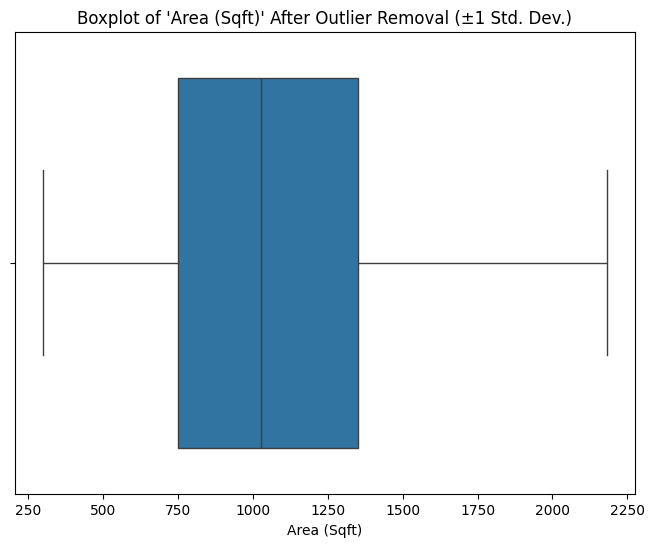

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation for the 'Area (Sqft)' column
mean_area = df['Area (Sqft)'].mean()
std_area = df['Area (Sqft)'].std()

# Calculate the Z-scores for the 'Area (Sqft)' column
df['AreaZscore'] = (df['Area (Sqft)'] - mean_area) / std_area

# Filter out rows where the Z-score is outside the ±1 standard deviation range
df = df[(df['AreaZscore'] >= -2) & (df['AreaZscore'] <= 2)]

# Drop the 'AreaZscore' column as it's no longer needed
df = df.drop(columns=['AreaZscore'])

# Visualize the column with a boxplot to confirm outliers are removed
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Area (Sqft)'])
plt.title("Boxplot of 'Area (Sqft)' After Outlier Removal (±1 Std. Dev.)")
plt.xlabel("Area (Sqft)")
plt.show()





In [188]:

def remove_pps_outliers_by_city(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('City'):
        m = np.mean(subdf['Price/sqft'])
        std = np.std(subdf['Price/sqft'])
        reduced_df = subdf[(subdf['Price/sqft'] > (m-std)) & (subdf['Price/sqft'] <= (m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index= True)
    return df_out

# Apply the function
df = remove_pps_outliers_by_city(df)

# Check the shape of the new DataFrame
df.shape


(58572, 27)

In [189]:
def remove_pps_outliers_by_city2(df):
    filtered_dfs = []
    for key, subdf in df.groupby('City'):
        if len(subdf) > 2:  # Ensure there are enough data points
            m = subdf['Price/sqft'].mean()
            std = subdf['Price/sqft'].std()
            reduced_df = subdf[(subdf['Price/sqft'] >= (m - std)) & (subdf['Price/sqft'] <= (m + std))]
            filtered_dfs.append(reduced_df)
    return pd.concat(filtered_dfs, ignore_index=True) if filtered_dfs else pd.DataFrame()


df = remove_pps_outliers_by_city2(df)

df.shape

(37587, 27)

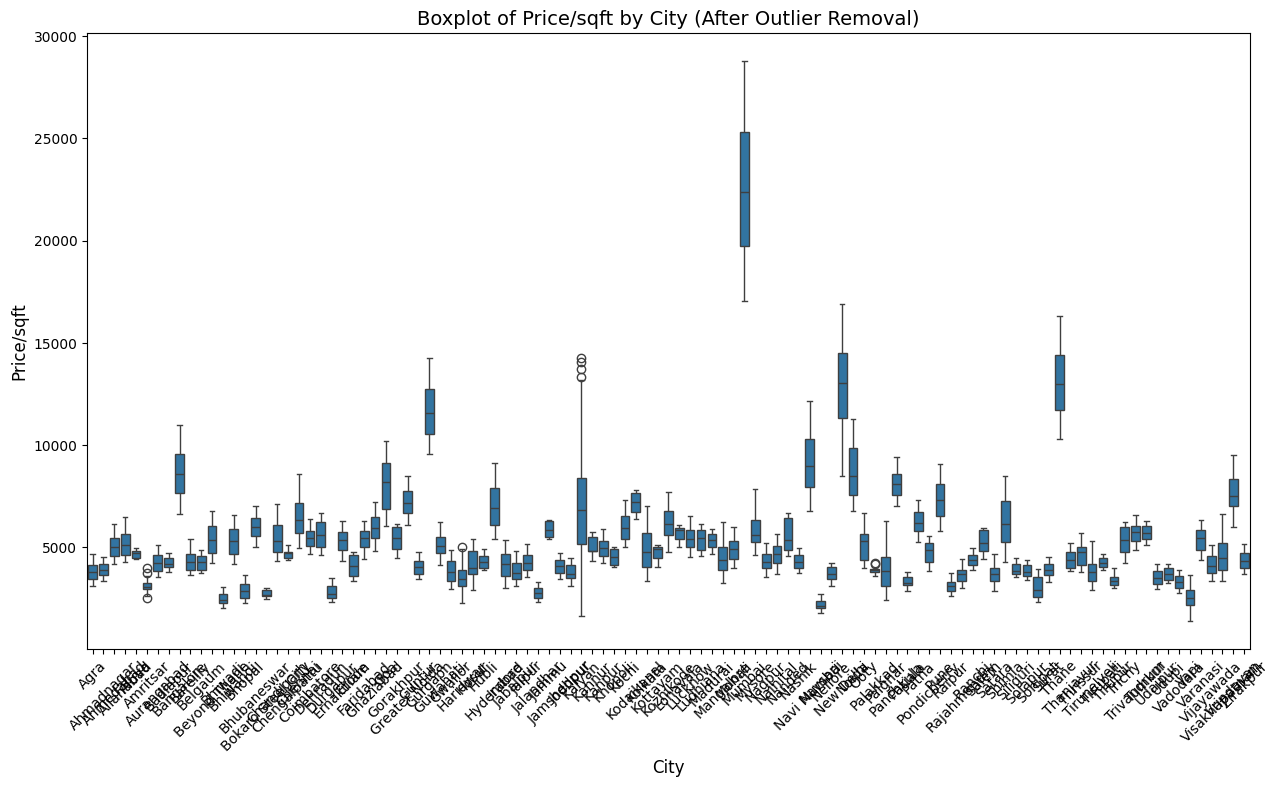

In [190]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for each city
plt.figure(figsize=(15, 8))
sns.boxplot(x='City', y='Price/sqft', data=df)

# Set plot labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Price/sqft', fontsize=12)
plt.title('Boxplot of Price/sqft by City (After Outlier Removal)', fontsize=14)
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.show()


In [191]:
def remove_amount_outliers_by_city(df):
    filtered_dfs = []
    for key, subdf in df.groupby('City'):
        if len(subdf) > 2:  # Ensure there are enough data points
            m = subdf['Amount (Lac)'].mean()
            std = subdf['Amount (Lac)'].std()
            reduced_df = subdf[(subdf['Amount (Lac)'] >= (m - std)) & (subdf['Amount (Lac)'] <= (m + std))]
            filtered_dfs.append(reduced_df)
    return pd.concat(filtered_dfs, ignore_index=True) if filtered_dfs else pd.DataFrame()


df = remove_amount_outliers_by_city(df)

df.shape

(26751, 27)

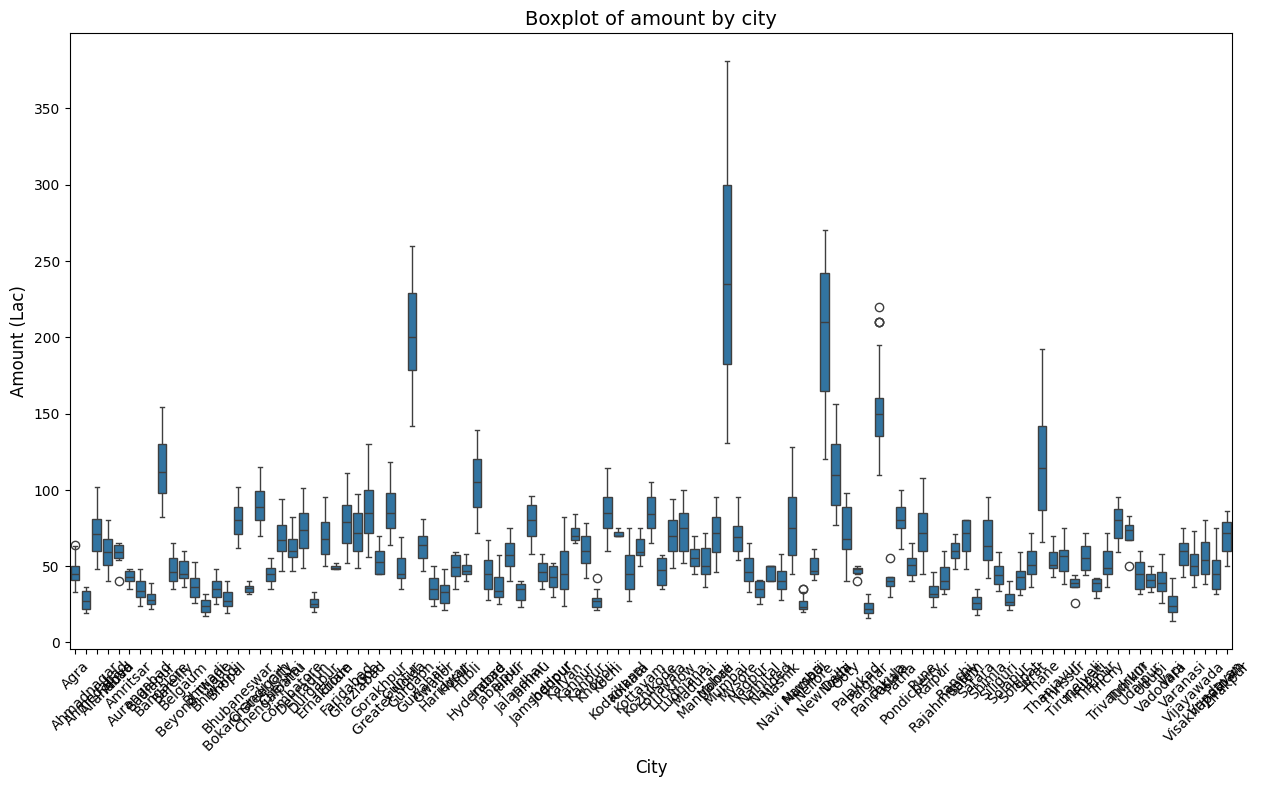

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for each city
plt.figure(figsize=(15, 8))
sns.boxplot(x='City', y='Amount (Lac)', data=df)

# Set plot labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Amount (Lac)', fontsize=12)
plt.title('Boxplot of amount by city', fontsize=14)
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.show()

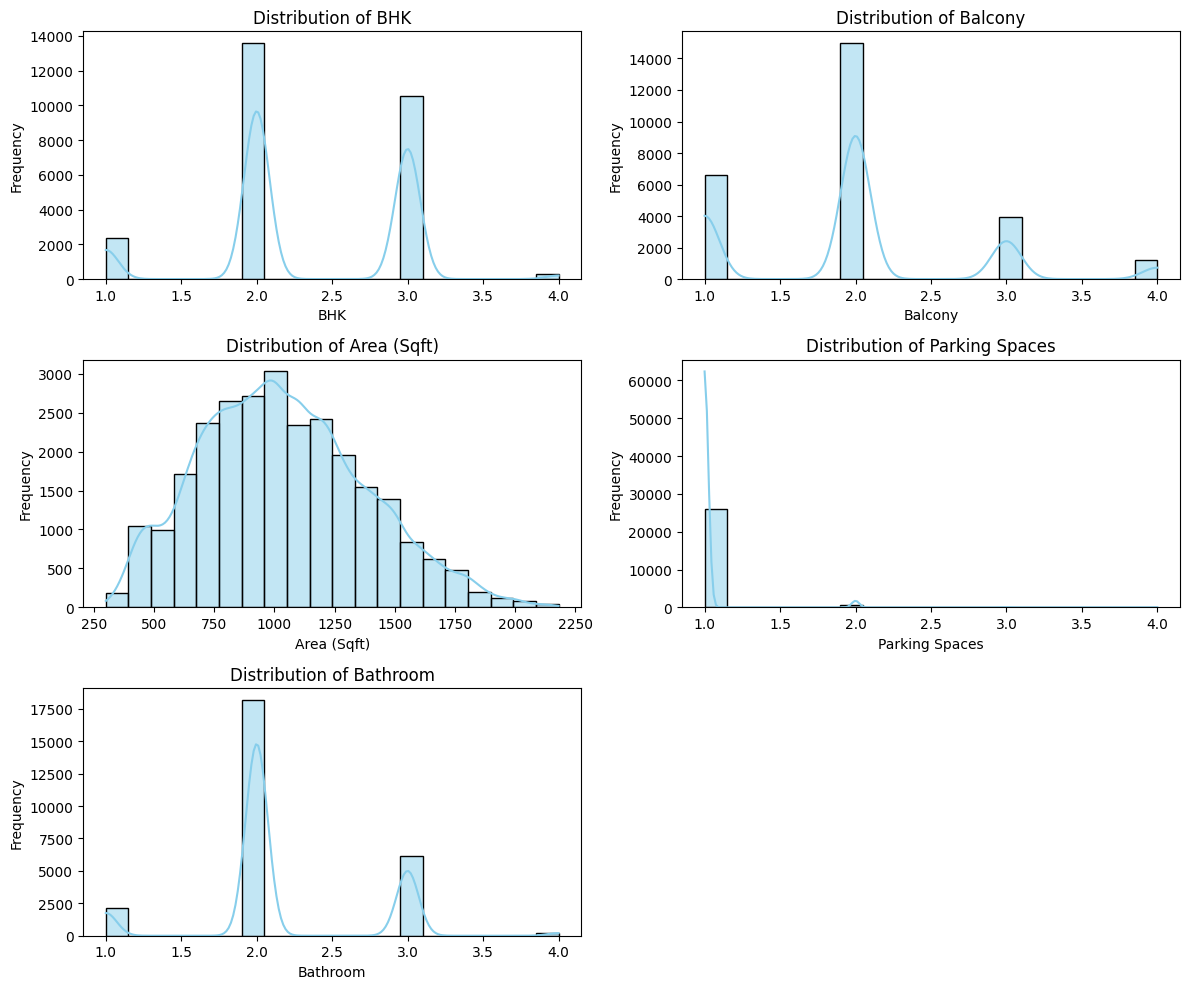

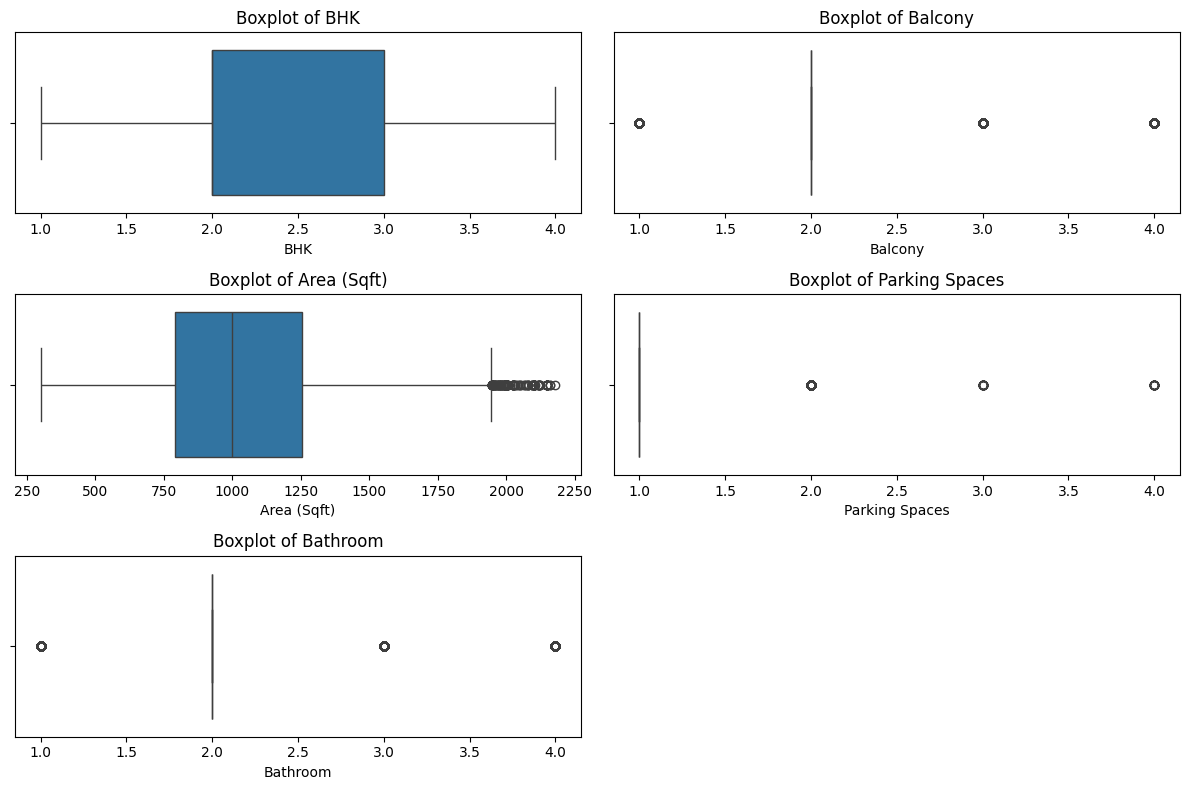

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to visualize the distribution for
columns_to_plot = ['BHK', 'Balcony', 'Area (Sqft)', 'Parking Spaces', 'Bathroom']

# Plotting the distribution (histograms and boxplots)
plt.figure(figsize=(12, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    
    # Plot histogram
    sns.histplot(df[column], kde=True, color='skyblue', bins=20)
    
    # Set titles and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#  plot boxplots as well to observe the spread and outliers
plt.figure(figsize=(12 , 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()





In [194]:
df = df.drop(columns = ['Price/sqft', 'Unfurnished', 'Age 10 to 15 Years'], axis = 1)



In [197]:
# Count the number of entries for each city
city_counts = df["City"].value_counts()

# Filter cities with at least 30 entries
valid_cities = city_counts[city_counts >= 30].index

# Subset the original data to include only valid cities
df = df[df["City"].isin(valid_cities)]

# Display the updated data
print(f"Number of rows after filtering: {df.shape[0]}")
df["City"].value_counts()



Number of rows after filtering: 26385


City
Navi Mumbai      1319
Thane            1290
Kolkata          1122
Visakhapatnam     959
Chennai           948
                 ... 
Bhiwandi           38
Shimla             36
Udaipur            36
Jabalpur           36
Rajahmundry        31
Name: count, Length: 72, dtype: int64

In [198]:

df.to_csv('cleaned_house_data.csv', index= False)